#                             Covid - 19 Live Project

 Cunducted COVID-19 data analysis using Python and its libraries.

1. Identified top 7 states with the highest active cases.
2. Discovered top 7 states with the most cured states.
3. Highlated top 7 states with the maximum reported deaths.

 Datalink:- https://www.mohfw.gov.in/data/datanew.json

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_json('https://www.mohfw.gov.in/data/datanew.json')

In [3]:
df.head(10)

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,death_reconsille,total,state_code,actualdeath24hrs
0,1,Andaman and Nicobar Islands,0,10766,10637,129,0,10766,10637,129,,,35,0
1,2,Andhra Pradesh,0,2340676,2325943,14733,0,2340676,2325943,14733,,,28,0
2,3,Arunachal Pradesh,0,67049,66753,296,0,67049,66753,296,,,12,0
3,4,Assam,5,746159,738119,8035,5,746159,738119,8035,,,18,0
4,5,Bihar,1,855267,842952,12314,1,855267,842952,12314,,,10,0
5,6,Chandigarh,0,100693,99508,1185,0,100693,99508,1185,,,4,0
6,7,Chhattisgarh,0,1187695,1173505,14190,0,1187695,1173505,14190,,,22,0
7,8,Dadra and Nagar Haveli and Daman and Diu,0,11592,11588,4,0,11592,11588,4,,,26,0
8,9,Delhi,9,2040930,2014255,26666,8,2040933,2014259,26666,,,7,0
9,10,Goa*,5,263352,259333,4014,3,263352,259335,4014,,,30,0


In [4]:
df.tail()

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,death_reconsille,total,state_code,actualdeath24hrs
32,33,Tripura,0,108493,107551,942,1,108494,107551,942,,,16,0
33,34,Uttarakhand,0,452572,444804,7768,0,452572,444804,7768,,,5,0
34,35,Uttar Pradesh,56,2145440,2121672,23712,56,2145440,2121672,23712,,,9,0
35,36,West Bengal,108,2126333,2104670,21555,102,2126334,2104677,21555,,,19,0
36,37,,520,44999548,44465693,532030,480,44999599,44465783,532031,,1,0,1


In [5]:
df=df.iloc[:-1,:]
df.tail()

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,death_reconsille,total,state_code,actualdeath24hrs
31,32,Telangana,4,844437,840322,4111,4,844438,840323,4111,,,36,0
32,33,Tripura,0,108493,107551,942,1,108494,107551,942,,,16,0
33,34,Uttarakhand,0,452572,444804,7768,0,452572,444804,7768,,,5,0
34,35,Uttar Pradesh,56,2145440,2121672,23712,56,2145440,2121672,23712,,,9,0
35,36,West Bengal,108,2126333,2104670,21555,102,2126334,2104677,21555,,,19,0


<Axes: xlabel='new_death', ylabel='state_name'>

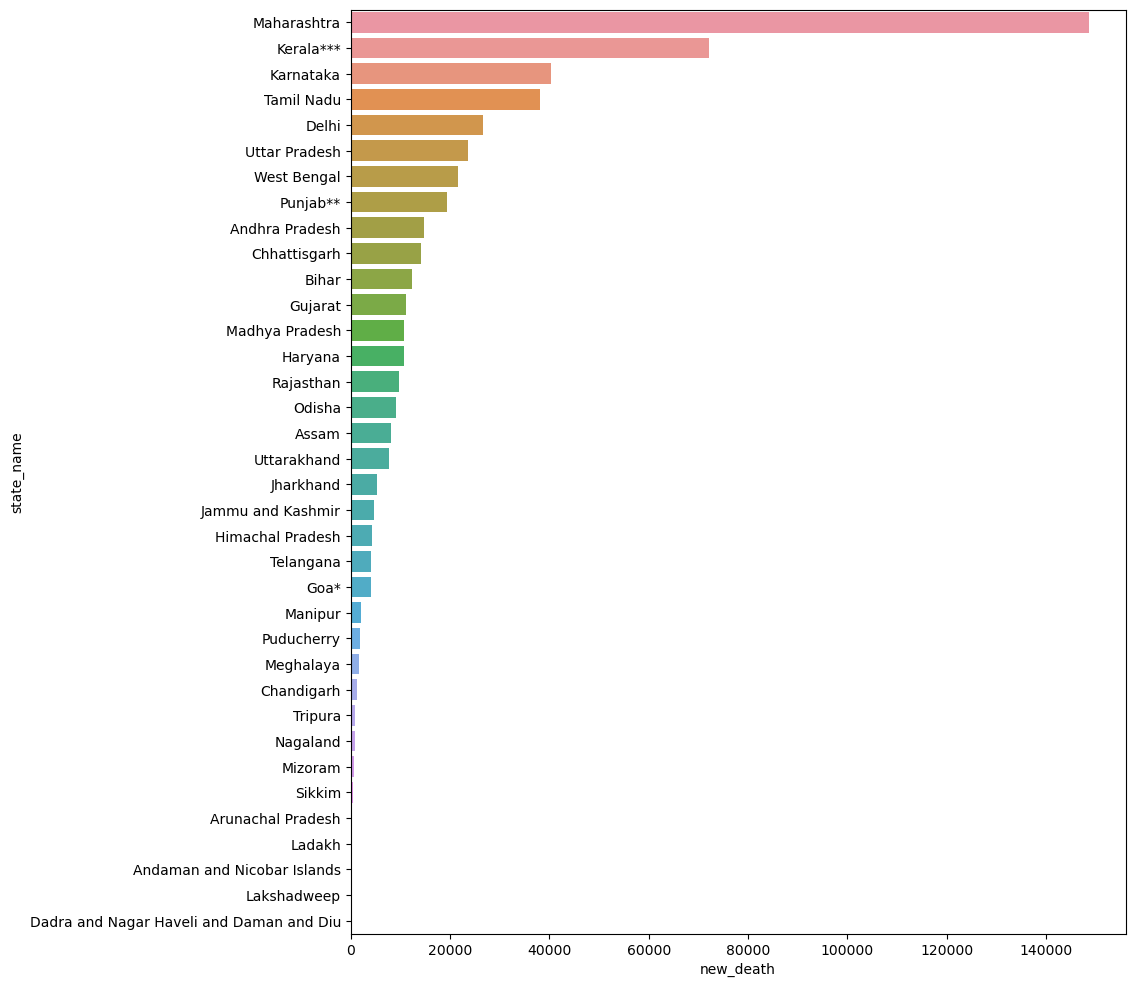

In [6]:
df_sorted = df.sort_values(by='new_death', ascending=False)

plt.figure(figsize=(10,12))
sns.barplot(x='new_death', y='state_name', data=df_sorted)

# 

# 1. Top seven active states

In [7]:
active_case=df.sort_values(['active'], ascending=False)
active=active_case.head(7)
active

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,death_reconsille,total,state_code,actualdeath24hrs
20,21,Maharashtra,251,8171321,8022509,148561,210,8171343,8022572,148561,,,27,0
35,36,West Bengal,108,2126333,2104670,21555,102,2126334,2104677,21555,,,19,0
34,35,Uttar Pradesh,56,2145440,2121672,23712,56,2145440,2121672,23712,,,9,0
16,17,Kerala***,25,6907268,6835201,72042,19,6907270,6835209,72042,,,32,0
15,16,Karnataka,20,4088794,4048416,40358,27,4088804,4048419,40358,,,29,0
30,31,Tamil Nadu,10,3610667,3572576,38081,13,3610671,3572577,38081,,,33,0
8,9,Delhi,9,2040930,2014255,26666,8,2040933,2014259,26666,,,7,0


In [9]:
def top_seven_states_index(x):
    positive = list(x)
    top_seven_states= []
    index_active = []
    top_seven_states_active = []
    state_active = []
    
    for i in range(7):        
        top_seven_states.append(max(positive))
        positive.remove(max(positive))  
        
    for i in range(len(x)):
        for j in range(len(top_seven_states)):
            if x[i] == top_seven_states[j]:
                index_active.append(i)
                
    for i in index_active:   
        state_active.append(df["state_name"][i])
        
    for i in index_active:
        top_seven_states_active.append(x[i])   
        
    return top_seven_states_active , state_active , index_active 

In [10]:
top_seven_states_active , state_active , index_active = top_seven_states_index(df["active"])

In [11]:
print(index_active)
print(f"top seven states_active : {top_seven_states_active}")
print(f"states_name : {state_active}")

[8, 15, 16, 20, 30, 34, 35]
top seven states_active : [9, 20, 25, 251, 10, 56, 108]
states_name : ['Delhi', 'Karnataka', 'Kerala***', 'Maharashtra', 'Tamil Nadu', 'Uttar Pradesh', 'West Bengal']


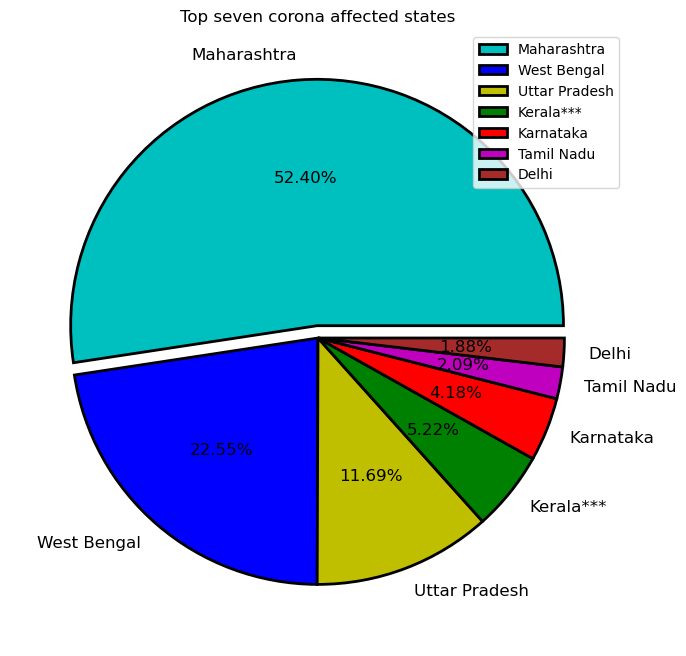

In [21]:
plt.figure(figsize=(8,8))
explode=[0.05,0,0,0,0,0,0]
colors=['c','b','y','g','r','m','brown']
plt.title('Top seven corona affected states')
textprops={'fontsize':12}
fontdict={'fontsize':12}
wedgeprops = {"linewidth":2 , 'width':1, 'edgecolor':'black'}
plt.pie(active['active'],explode=explode, labels=active['state_name'], colors=colors , autopct='%0.2f%%', pctdistance=0.6,  wedgeprops=wedgeprops ,textprops=textprops)
plt.legend(loc=1)
plt.show()

# 

# 2. Top seven cured states

In [12]:

data_cured = df.sort_values(["cured"]  , ascending = False)
data_cured = data_cured.iloc[:7, :]
data_cured

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,death_reconsille,total,state_code,actualdeath24hrs
20,21,Maharashtra,251,8171321,8022509,148561,210,8171343,8022572,148561,,,27,0
16,17,Kerala***,25,6907268,6835201,72042,19,6907270,6835209,72042,,,32,0
15,16,Karnataka,20,4088794,4048416,40358,27,4088804,4048419,40358,,,29,0
30,31,Tamil Nadu,10,3610667,3572576,38081,13,3610671,3572577,38081,,,33,0
1,2,Andhra Pradesh,0,2340676,2325943,14733,0,2340676,2325943,14733,,,28,0
34,35,Uttar Pradesh,56,2145440,2121672,23712,56,2145440,2121672,23712,,,9,0
35,36,West Bengal,108,2126333,2104670,21555,102,2126334,2104677,21555,,,19,0


In [13]:
top_seven_states_cured , state_cured , index_cured = top_seven_states_index(df["cured"])

In [14]:
print(index_cured)
print(f"top seven states_cured : {top_seven_states_cured}")
print(f"states_name : {state_cured}")

[1, 15, 16, 20, 30, 34, 35]
top seven states_cured : [2325943, 4048416, 6835201, 8022509, 3572576, 2121672, 2104670]
states_name : ['Andhra Pradesh', 'Karnataka', 'Kerala***', 'Maharashtra', 'Tamil Nadu', 'Uttar Pradesh', 'West Bengal']


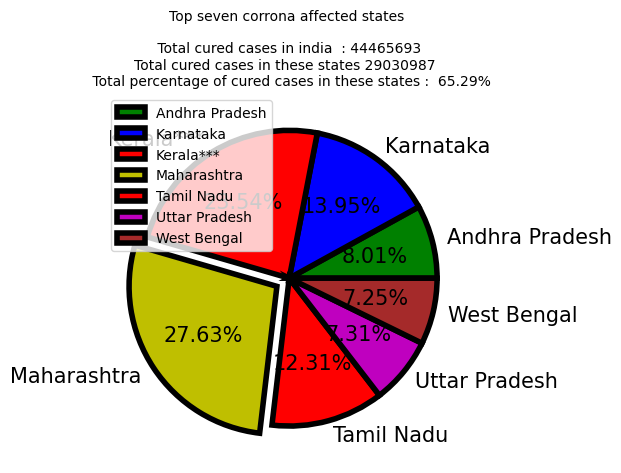

In [15]:
explode = [0.1 if i == max(top_seven_states_cured) 
           else 0 for pos,i in enumerate(top_seven_states_cured)]
colors = ["g","b","r","y","r" ,"m" , "brown"]
textprops = {"fontsize":15}
wedgeprops = {"linewidth": 4 , "width": 1 , "edgecolor" : "k"}
# plt.figure(figsize=(16,9))
fontdict = {"fontsize":10}
plt.title("Top seven corrona affected states \n \n Total cured cases in india  : {} \nTotal cured cases in these states {}  \n Total percentage of cured cases in these states :  {}%".format(sum(df["cured"]) , sum(top_seven_states_cured) , round(sum(top_seven_states_cured) / sum(df["cured"])  , 4)*100) , fontdict=fontdict)
plt.pie(top_seven_states_cured, labels = state_cured,explode = explode,colors = colors, autopct= "%0.2f%%",radius = 1,textprops = textprops,
       pctdistance = 0.6,labeldistance = 1.1 ,wedgeprops = wedgeprops , rotatelabels=False )
plt.legend(loc = 0)
plt.show()

#    

# 3. Top seven death states

In [17]:
data_death = df.sort_values(["death"]  , ascending = False)
data_death = data_cured.iloc[:7, :]
data_death

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,death_reconsille,total,state_code,actualdeath24hrs
20,21,Maharashtra,251,8171321,8022509,148561,210,8171343,8022572,148561,,,27,0
16,17,Kerala***,25,6907268,6835201,72042,19,6907270,6835209,72042,,,32,0
15,16,Karnataka,20,4088794,4048416,40358,27,4088804,4048419,40358,,,29,0
30,31,Tamil Nadu,10,3610667,3572576,38081,13,3610671,3572577,38081,,,33,0
1,2,Andhra Pradesh,0,2340676,2325943,14733,0,2340676,2325943,14733,,,28,0
34,35,Uttar Pradesh,56,2145440,2121672,23712,56,2145440,2121672,23712,,,9,0
35,36,West Bengal,108,2126333,2104670,21555,102,2126334,2104677,21555,,,19,0


In [16]:
top_seven_states_death , state_death , index_death = top_seven_states_index(df["death"])

In [18]:
print(index_cured)
print(f"top seven states_death : {top_seven_states_death}")
print(f"states_death : {state_death}")

[1, 15, 16, 20, 30, 34, 35]
top seven states_death : [26666, 40358, 72042, 148561, 38081, 23712, 21555]
states_death : ['Delhi', 'Karnataka', 'Kerala***', 'Maharashtra', 'Tamil Nadu', 'Uttar Pradesh', 'West Bengal']


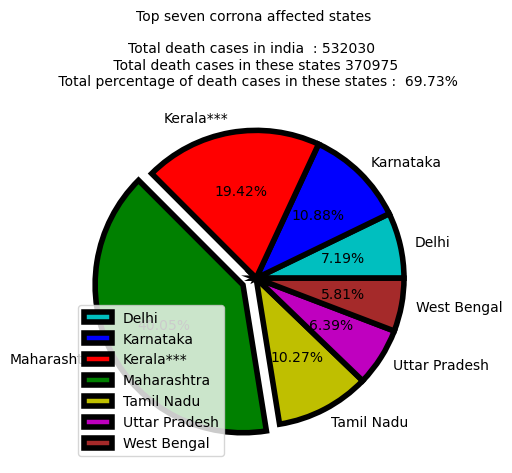

In [19]:
explode = [0.1 if i == max(top_seven_states_death) 
           else 0 for pos,i in enumerate(top_seven_states_death)]
colors = ["c","b","r","g","y" ,"m" , "brown"]
textprops = {"fontsize":10}
wedgeprops = {"linewidth": 4 , "width": 1 , "edgecolor" : "k"}
# plt.figure(figsize=(16,9))
fontdict = {"fontsize":10}
plt.title("Top seven corrona affected states \n \nTotal death cases in india  : {}  \n Total death cases in these states {} \n Total percentage of death cases in these states :  {}%".format(sum(df["death"]), sum(top_seven_states_death) , round(sum(top_seven_states_death) / sum(df["death"]), 4) *100) , fontdict=fontdict)
plt.pie(top_seven_states_death, labels = state_death,explode = explode,colors = colors, autopct= "%0.2f%%",radius = 1,textprops = textprops,
       pctdistance = 0.6,labeldistance = 1.1 ,wedgeprops = wedgeprops , rotatelabels=False )
plt.legend(loc = 0)
# plt.legend('', frameon=False)

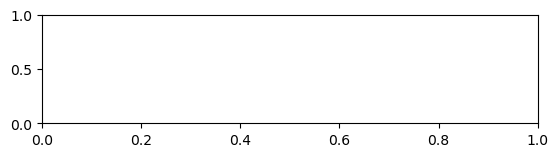

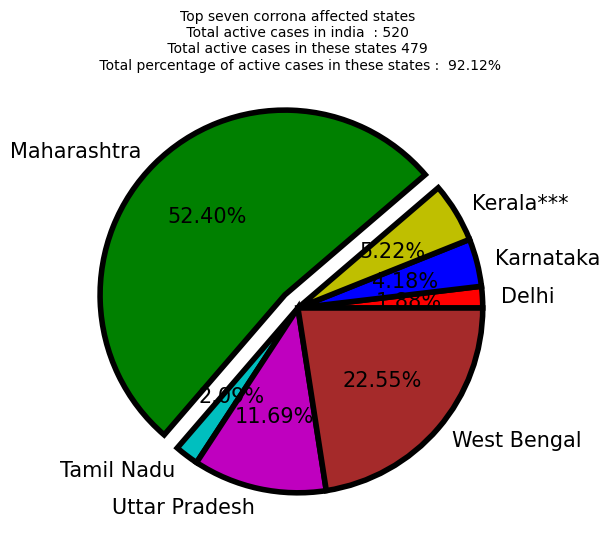

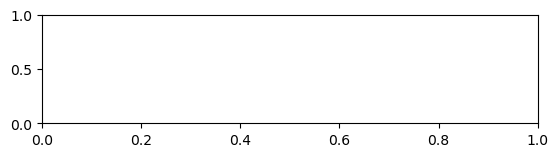

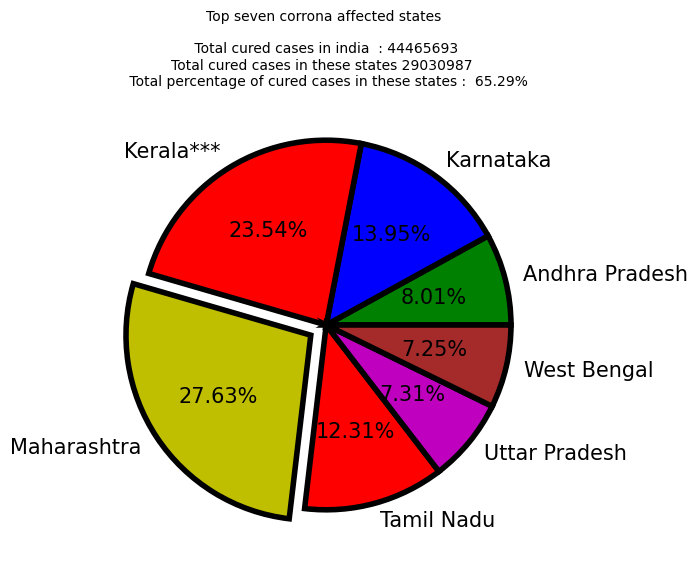

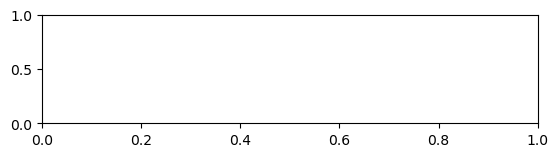

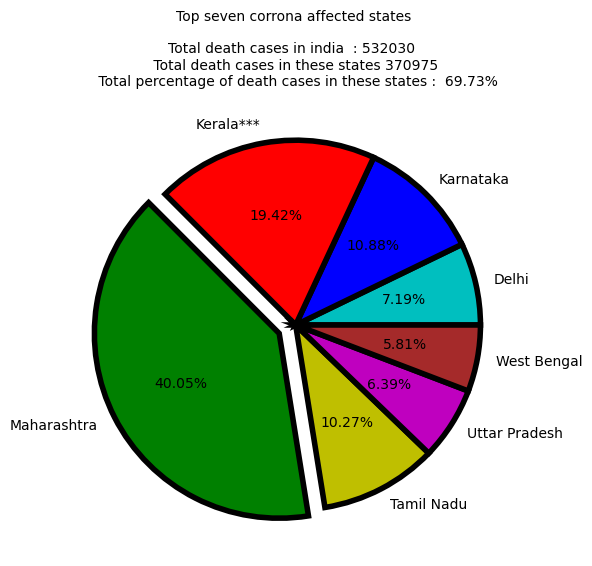

In [20]:
############################################## active case #####################################

plt.subplot(3,1,1)
top_seven_states_active , state_active , index_active = top_seven_states_index(df["active"])
#plt.figure(figsize = (10 , 10))
explode = [0.1 if i == max(top_seven_states_active) 
           else 0 for pos,i in enumerate(top_seven_states_active)]
colors = ["r","b","y","g","c" ,"m" , "brown"]
textprops = {"fontsize":15}
wedgeprops = {"linewidth": 4 , "width": 1 , "edgecolor" : "k"}
plt.figure(figsize=(10,6))
fontdict = {"fontsize":10}
plt.title("Top seven corrona affected states\n Total active cases in india  : {} \n Total active cases in these states {} \n Total percentage of active cases in these states :  {}%".format(sum(df["active"]) , sum(top_seven_states_active)  , round(sum(top_seven_states_active) / sum(df["active"])  , 4)* 100 ), fontdict=fontdict)
#plt.title(f"Top seven corrona affected states \n Total active cases in these states : {sum(top_seven_states_active)} \n Total active cases in india  : {sum(df["active"])} ", fontdict=fontdict)
plt.pie(top_seven_states_active, labels = state_active,explode = explode,colors = colors, autopct= "%0.2f%%",radius = 1,textprops = textprops,
       pctdistance = 0.6,labeldistance = 1.1 ,wedgeprops = wedgeprops , rotatelabels=False )
# plt.legend(loc = 0)
plt.show()

################################################# cured_case ############################################


plt.subplot(3,1,2)
top_seven_states_cured , state_cured , index_cured = top_seven_states_index(df["cured"])
explode = [0.1 if i == max(top_seven_states_cured) 
           else 0 for pos,i in enumerate(top_seven_states_cured)]
colors = ["g","b","r","y","r" ,"m" , "brown"]
textprops = {"fontsize":15}
wedgeprops = {"linewidth": 4 , "width": 1 , "edgecolor" : "k"}
plt.figure(figsize=(10,6))
fontdict = {"fontsize":10}
plt.title("Top seven corrona affected states \n \n Total cured cases in india  : {} \nTotal cured cases in these states {}  \n Total percentage of cured cases in these states :  {}%".format(sum(df["cured"]) , sum(top_seven_states_cured) , round(sum(top_seven_states_cured) / sum(df["cured"])  , 4)*100) , fontdict=fontdict)
plt.pie(top_seven_states_cured, labels = state_cured,explode = explode,colors = colors, autopct= "%0.2f%%",radius = 1,textprops = textprops,
       pctdistance = 0.6,labeldistance = 1.1 ,wedgeprops = wedgeprops , rotatelabels=False )
# plt.legend(loc = 0)
plt.show()


################################################### death cases###########################################

#plt.figure(figsize = (16,7))
plt.subplot(3,1,3)
top_seven_states_death , state_death , index_death = top_seven_states_index(df["death"])
explode = [0.1 if i == max(top_seven_states_death) 
           else 0 for pos,i in enumerate(top_seven_states_death)]
colors = ["c","b","r","g","y" ,"m" , "brown"]
textprops = {"fontsize":10}
wedgeprops = {"linewidth": 4 , "width": 1 , "edgecolor" : "k"}
plt.figure(figsize=(10,6))
fontdict = {"fontsize":10}
plt.title("Top seven corrona affected states \n \nTotal death cases in india  : {}  \n Total death cases in these states {} \n Total percentage of death cases in these states :  {}%".format(sum(df["death"]), sum(top_seven_states_death) , round(sum(top_seven_states_death) / sum(df["death"]), 4) *100) , fontdict=fontdict)
plt.pie(top_seven_states_death, labels = state_death,explode = explode,colors = colors, autopct= "%0.2f%%",radius = 1,textprops = textprops,
       pctdistance = 0.6,labeldistance = 1.1 ,wedgeprops = wedgeprops , rotatelabels=False )
plt.show()
